<a href="https://www.kaggle.com/code/mohamedbakrey/day-6-to-learn-pytorch-prebuilt-d-t?scriptVersionId=106029010" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="border:2px solid #030833; border-radius:15px;  background:#ffffff;">
    <div style="padding:10px 10px 10px 0px; margin:2px; border-radius:12px; background:#410F01; text-align:center;">
        <span style="font-family:sans-serif; font-size:50px; color:#fff;">Prebuilt Datasets and Transforms</span>
    </div>
</div>

<div style="border:2px solid #030833; border-radius:10px;  background:#fff;">
    <div style="padding:10px 10px 10px 0px; margin:2px; border-radius:10px; background:#410F01;">
        <span style="margin-left:15px; font-family:sans-serif; font-size:20px; color:#fff;">Objective... 📜</span>
    </div>
</div>

<ul><li> How to use MNIST prebuilt dataset in pytorch.</li></ul> 


<h2>Table of Contents</h2>
<p>In this lab, you will use a prebuilt dataset and then use some prebuilt dataset transforms.</p>
<ul>
    <li><a href="https://#Prebuilt_Dataset">Prebuilt Datasets</a></li>
    <li><a href="https://#Torchvision">Torchvision Transforms</a></li>
</ul>



<hr>


<h2>Preparation</h2>

The following are the libraries we are going to use for this lab. The <code>torch.manual_seed()</code> is for forcing the random function to give the same number every time we try to recompile it.



In [3]:
# These are the libraries will be used for this lab.

!pip install torchvision==0.9.1 torch==1.8.1 
import torch 
import matplotlib.pylab as plt
import numpy as np
torch.manual_seed(0)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 29.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 804.1/804.1 MB 552.9 kB/s eta 0:00:0000:0100:01
  Attempting uninstall: torch
    Found existing installation: torch 1.11.0+cpu
    Uninstalling torch-1.11.0+cpu:
      Successfully uninstalled torch-1.11.0+cpu
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.12.0+cpu
    Uninstalling torchvision-0.12.0+cpu:
      Successfully uninstalled torchvision-0.12.0+cpu
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.12.0 requires torch==1.11.0, but you have torch 1.8.1 which is incompatible.
torchaudio 0.11.0+cpu requires torch==1.11.0, but you have torch 1.8.1 which is incompatible.
pytorch-lightning 1.7.6 requires torch>=1.9.*, but you have torch 1.8.1 which is incompatible.
allennlp 2.10.0

This is the function for displaying images.


In [4]:
# Show data by diagram

def show_data(data_sample, shape = (28, 28)):
    plt.imshow(data_sample[0].numpy().reshape(shape), cmap='gray')
    plt.title('y = ' + str(data_sample[1]))

<h2 id="Prebuilt_Dataset">Prebuilt Datasets</h2> 

You will focus on the following libraries:


In [5]:
# Run the command below when you do not have torchvision installed
# !mamba install -y torchvision

import torchvision.transforms as transforms
import torchvision.datasets as dsets

We can import a prebuilt dataset. In this case, use MNIST. We'll work with several of these parameters later by placing a transform object in the argument <code>transform</code>.


In [7]:
# Import the prebuilt dataset into variable dataset


dataset = dsets.MNIST(
    root = './data',  
    download = True, 
    transform = transforms.ToTensor()
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Processing...
Done!


/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Each element of the dataset object contains a tuple. Let us see whether the first element in the dataset is a tuple and what is in it.


In [8]:
# Examine whether the elements in dataset MNIST are tuples, and what is in the tuple?

print("Type of the first element: ", type(dataset[0]))
print("The length of the tuple: ", len(dataset[0]))
print("The shape of the first element in the tuple: ", dataset[0][0].shape)
print("The type of the first element in the tuple", type(dataset[0][0]))
print("The second element in the tuple: ", dataset[0][1])
print("The type of the second element in the tuple: ", type(dataset[0][1]))
print("As the result, the structure of the first element in the dataset is (tensor([1, 28, 28]), tensor(7)).")

Type of the first element:  <class 'tuple'>
The length of the tuple:  2
The shape of the first element in the tuple:  torch.Size([1, 28, 28])
The type of the first element in the tuple <class 'torch.Tensor'>
The second element in the tuple:  5
The type of the second element in the tuple:  <class 'int'>
As the result, the structure of the first element in the dataset is (tensor([1, 28, 28]), tensor(7)).


As shown in the output, the first element in the tuple is a cuboid tensor. As you can see, there is a dimension with only size 1, so basically, it is a rectangular tensor.<br>
The second element in the tuple is a number tensor, which indicate the real number the image shows. As the second element in the tuple is <code>tensor(7)</code>, the image should show a hand-written 7.


Let us plot the first element in the dataset:


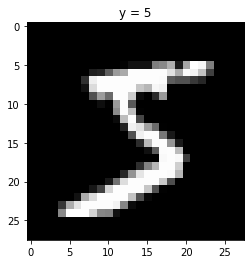

In [9]:
# Plot the first element in the dataset

show_data(dataset[0])

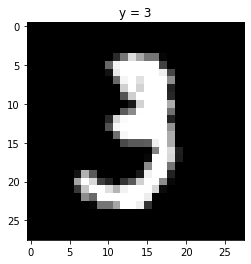

In [10]:
# Plot the first element in the dataset

show_data(dataset[10])

<h2 id="Torchvision"> Torchvision Transforms  </h2> 

We can apply some image transform functions on the MNIST dataset.

As an example, the images in the MNIST dataset can be cropped and converted to a tensor. We can use <code>transform.Compose</code> we learned from the previous lab to combine the two transform functions.


In [11]:
# Combine two transforms: crop and convert to tensor. Apply the compose to MNIST dataset

croptensor_data_transform = transforms.Compose([transforms.CenterCrop(20), transforms.ToTensor()])
dataset = dsets.MNIST(root = './data', download = True, transform = croptensor_data_transform)
print("The shape of the first element in the first tuple: ", dataset[0][0].shape)

The shape of the first element in the first tuple:  torch.Size([1, 20, 20])


We can see the image is now 20 x 20 instead of 28 x 28.

Let us plot the first image again. Notice that the black space around the <b>7</b> become less apparent.


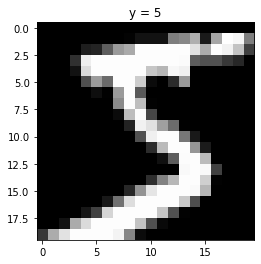

In [14]:
# Plot the first element in the dataset

show_data(dataset[0],shape = (20, 20))

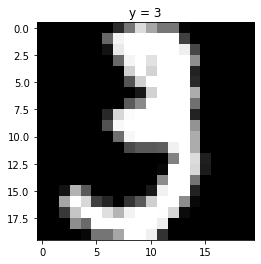

In [15]:
# Plot the first element in the dataset

show_data(dataset[10],shape = (20, 20))

In the below example, we horizontally flip the image, and then convert it to a tensor. Use <code>transforms.Compose()</code> to combine these two transform functions. Plot the flipped image.


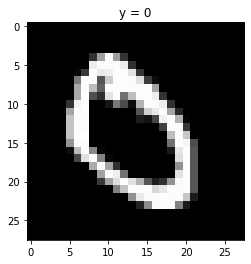

In [16]:
# Construct the compose. Apply it on MNIST dataset. Plot the image out.

fliptensor_data_transform = transforms.Compose([transforms.RandomHorizontalFlip(p = 1),transforms.ToTensor()])
dataset = dsets.MNIST(root = './data', download = True, transform = fliptensor_data_transform)
show_data(dataset[1])

<div style="border:2px solid #030833; border-radius:10px;  background:#fff;">
    <div style="padding:10px 10px 10px 0px; margin:2px; border-radius:10px; background:#410F01;">
        <span style="margin-left:15px; font-family:sans-serif; font-size:20px; color:#fff;">Summary... 📥</span>
    </div>
</div>

In this work, we work on explaining the basics that are used in deep learning using PyTroch

You can find the first day [here](https://www.kaggle.com/code/mohamedbakrey/day-1-to-learn-pytorch-torch-tensors-in-1d)

You can find the second day [here](https://www.kaggle.com/code/mohamedbakrey/day-2-to-learn-pytorch-two-dimensional-tensors)

You can find the Thrid day [here](https://www.kaggle.com/code/mohamedbakrey/day-3-to-learn-pytorch-differentiation-in-pytorc)

You can find the Fourth day [here](https://www.kaggle.com/code/mohamedbakrey/day-4-to-learn-pytorch-simple-dataset)

You can find the Five day [here](https://www.kaggle.com/code/mohamedbakrey/day-5-to-learn-pytorch-image-datasets-and-transf)